<a href="https://colab.research.google.com/github/beastkp/stock_analysis/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [ ]:
stocks= input("Enter the code of the stocks: ")
data = yf.download(stocks,"2008-01-01","2021-01-18")
data.head()

Enter the code of the stocks: NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.572,7.876,7.564,7.850,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,7.967,53775


In [ ]:
data.shape

(3282, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3282 non-null   float64
 1   High       3282 non-null   float64
 2   Low        3282 non-null   float64
 3   Close      3282 non-null   float64
 4   Adj Close  3282 non-null   float64
 5   Volume     3282 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 179.5 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,13.577000,459196.000000


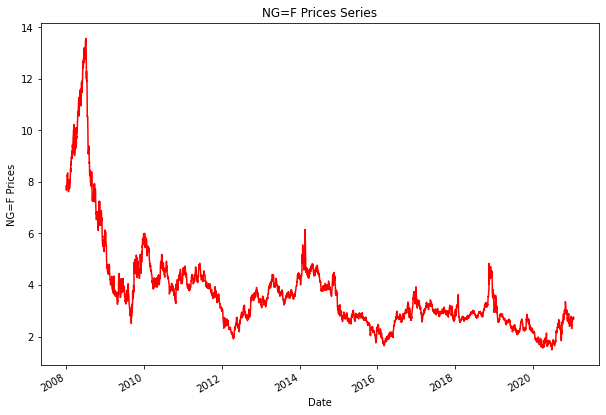

In [ ]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Prices Series".format(stocks))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


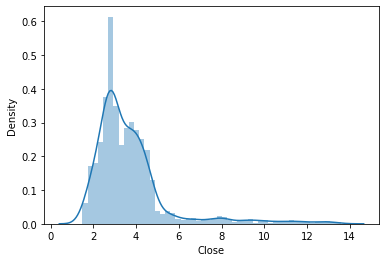

In [ ]:
sns.distplot(data['Close'])
#not normally distributed

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


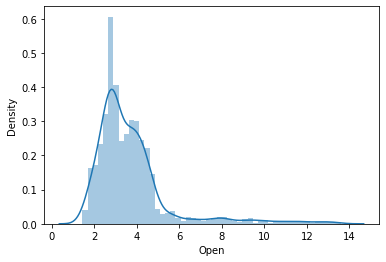

In [ ]:
sns.distplot(data['Open'])
# not normally dissributed

#Training the model

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop("Close", axis=1)
y= data["Close"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2625, 5)
(657, 5)
(2625,)
(657,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)

In [ ]:
pred1

array([ 2.81200004,  5.8210001 ,  2.66199994,  5.98999977,  2.08299994,
       12.86100006,  3.98799992,  4.82200003,  1.78199995,  4.79500008,
        2.83999991,  3.55999994,  2.73699999,  2.96099997,  4.22700024,
        2.46300006,  4.12099981,  4.55999994,  8.96500015,  2.93899989,
        4.35500002,  2.67499995,  2.53500009,  2.33699989,  2.85299993,
        1.94400001,  2.75900006,  3.93799996,  3.30599999,  4.70499992,
        3.99099994,  2.69799995, 11.59799957,  4.24399996,  4.33699989,
        3.70700002,  3.49900007,  5.41599989,  3.65700006,  3.43600011,
        3.98399997,  2.43000007,  2.66700006,  2.57999992,  3.14199996,
        4.41300011,  4.2670002 ,  2.73399997,  3.90899992,  2.03900003,
        4.08300018,  2.47199988,  2.26900005,  3.94099998,  1.92700005,
        3.23000002,  3.72300005,  4.87300014,  4.36399984,  3.40300012,
        2.70000005,  3.88100004,  4.6789999 ,  3.13800001,  2.47000003,
        2.55200005,  4.35699987,  3.898     ,  2.46700001,  2.83

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
# if r2_sqaure = 1 then model is very good
def calculate_metrics(y_test,y_pred):
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  r2_scors = r2_score(y_test,y_pred)
  # y_test is ground truth 
  # y_pred is model predicted value
  
  print("MSE = ",mse)
  print("RMSE = ",rmse)
  print("R2_Score = ",r2_scors)

calculate_metrics(y_test,pred1)

MSE =  1.3548791108554753e-29
RMSE =  3.680868254713112e-15
R2_Score =  1.0


In [ ]:
from sklearn.linear_model import Lasso,Ridge

la = Lasso().fit(X_train,y_train)
rd = Ridge().fit(X_train,y_train)

la_p = la.predict(X_test)
rd_p = rd.predict(X_test)



In [ ]:
calculate_metrics(y_test,la_p) 
#not that great scores 

MSE =  0.23692336260532862
RMSE =  0.4867477402159445
R2_Score =  0.9132831519010187


In [ ]:
calculate_metrics(y_test,rd_p) 
#Ridge regression saves our model from overfitting so this can to be used 

MSE =  2.8965487621932763e-05
RMSE =  0.005381959459335676
R2_Score =  0.9999893982773054


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV #for fine tuning of the model
svr = SVR()

param_grid =  {'C': [0.1, 1, 10, 100, 1000],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'kernel' :['rbf']}

grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.6s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.6s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.074 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
from sklearn.svm import SVR

# Create an instance of the SVR estimator
svr = SVR()
params = svr.get_params().keys()
print(params)


dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])


In [ ]:
svr = SVR(C=10,gamma=0.01,kernel ='rbf')
svr.fit(X_train,y_train)
svr_pred =svr.predict(X_test)

In [ ]:
import joblib 
joblib.dump(rd, 'model.pkl')
ridge_from_joblib = model = joblib.load("model.pkl")